NameError: name 'graph' is not defined

In [2]:
print "Hello" 

Hello


In [3]:
%matplotlib inline


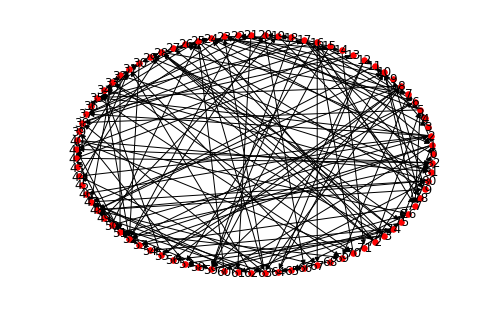

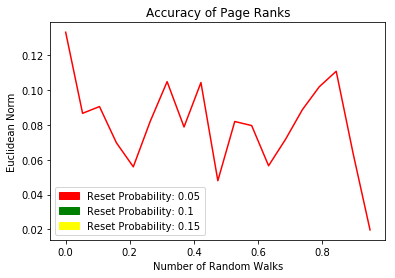

In [2]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from Page_Rank import IncrementalPersonalizedPageRank
from Page_Rank2 import IncrementalPersonalizedPageRank2
import numpy as np

random.seed(111)
graph = nx.DiGraph()
number_of_nodes = random.randint(2, 100)
nodes = range(number_of_nodes)
graph.add_nodes_from(nodes)
number_of_random_walks = 10
random_walk_length = 5
difference = list()

for _ in range(2 * number_of_nodes):
    node_1 = random.choice(list(graph.nodes))
    node_2 = random.choice(list(set(graph.nodes) - {node_1}))
    if graph.has_edge(node_1, node_2) or graph.has_edge(node_2, node_1):
        continue
    else:
        weight = random.randint(0, 10)
        graph.add_weighted_edges_from([(node_1, node_2, weight)])
nx.draw_circular(graph, node_size=30, with_labels=True)
plt.show()

difference = []
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0
    while reset_probability <= 0.9:
        reset_probability += 0.05
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, 0.05)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))

plt.plot(np.linspace(0, 0.95, 19), difference[0:19], 'r')#, np.linspace(0, 0.95, 19), difference[20:39], 'g',
         #np.linspace(0, 0.95, 19), difference[40:59], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()


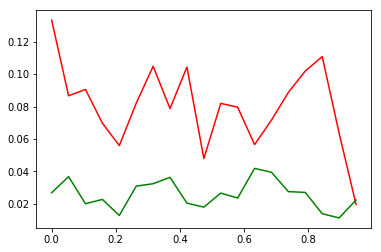

In [3]:
plt.plot(np.linspace(0, 0.95, 19), difference[0:19], 'r', np.linspace(0, 0.95, 19), difference[20:39], 'g')

ValueError: x and y must have same first dimension, but have shapes (19L,) and (14L,)

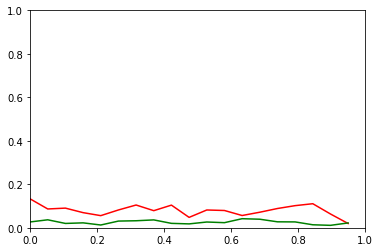

In [4]:
plt.plot(np.linspace(0, 0.95, 19), difference[0:19], 'r', np.linspace(0, 0.95, 19), difference[20:39], 'g',
         np.linspace(0, 0.95, 19), difference[40:59], 'y')


ValueError: x and y must have same first dimension, but have shapes (20L,) and (19L,)

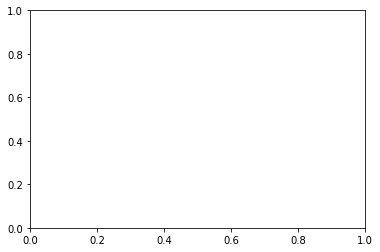

In [5]:
plt.plot(np.linspace(0, 0.95, 20), difference[0:19], 'r', np.linspace(0, 0.95, 20), difference[20:39], 'g',
         np.linspace(0, 0.95, 20), difference[40:59], 'y')


ValueError: x and y must have same first dimension, but have shapes (20L,) and (19L,)

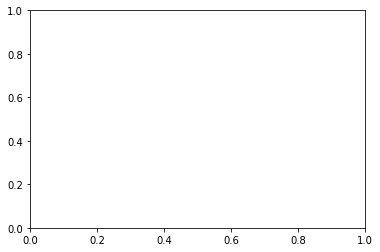

In [6]:
plt.plot(np.linspace(0.05, 0.95, 20), difference[0:19], 'r', np.linspace(0.05, 0.95, 20), difference[20:39], 'g',
         np.linspace(0.05, 0.95, 20), difference[40:59], 'y')




ValueError: x and y must have same first dimension, but have shapes (20L,) and (19L,)

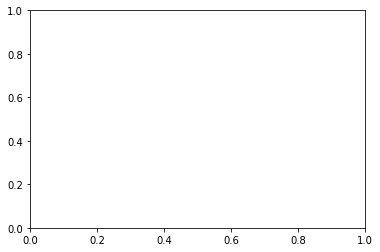

In [7]:
plt.plot(np.linspace(0.05, 0.95, 20), difference[0:19], 'r')

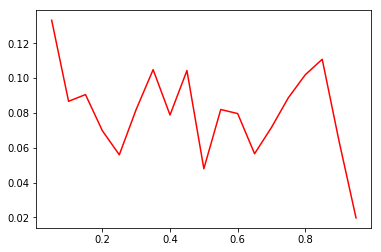

In [8]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:19], 'r')

ValueError: x and y must have same first dimension, but have shapes (20L,) and (19L,)

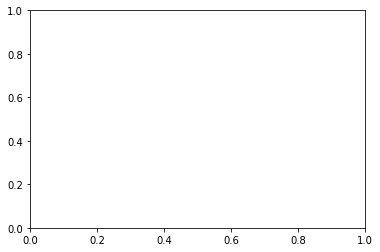

In [9]:
plt.plot(np.linspace(0.05, 0.95, 20), difference[0:19], 'r', np.linspace(0.05, 0.95, 20), difference[20:39], 'g',
         np.linspace(0.05, 0.95, 20), difference[40:59], 'y')

ValueError: x and y must have same first dimension, but have shapes (20L,) and (19L,)

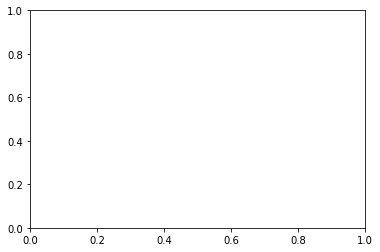

In [10]:
plt.plot(np.linspace(0.05, 0.95, 20), difference[0:19], 'r')

ValueError: x and y must have same first dimension, but have shapes (19L,) and (14L,)

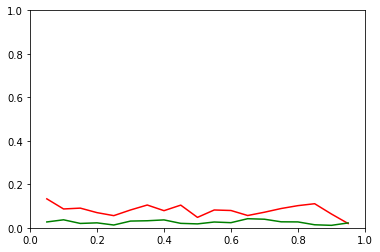

In [11]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:19], 'r', np.linspace(0.05, 0.95, 19), difference[20:39], 'g',
         np.linspace(0.05, 0.95, 19), difference[40:59], 'y')

ValueError: x and y must have same first dimension, but have shapes (20L,) and (19L,)

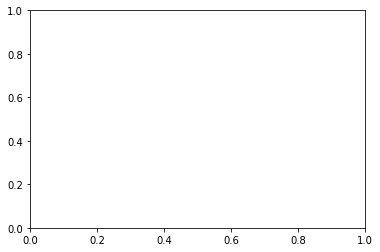

In [12]:
plt.plot(np.linspace(0.05, 0.95, 20), difference[0:19], 'r', np.linspace(0.05, 0.95, 20), difference[20:39], 'g',
         np.linspace(0.05, 0.95, 20), difference[40:59], 'y')

ValueError: x and y must have same first dimension, but have shapes (20L,) and (19L,)

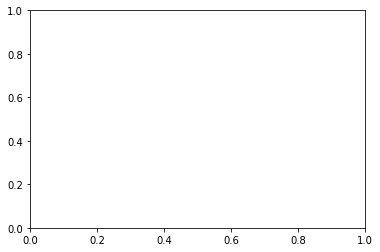

In [13]:
plt.plot(np.linspace(0.05, 0.95, 20), difference[0:19], 'r')

ValueError: x and y must have same first dimension, but have shapes (20L,) and (14L,)

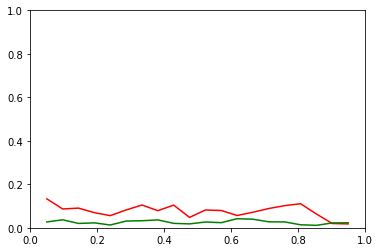

In [14]:
plt.plot(np.linspace(0.05, 0.95, 20), difference[0:20], 'r', np.linspace(0.05, 0.95, 20), difference[20:40], 'g',
         np.linspace(0.05, 0.95, 20), difference[40:60], 'y')

ValueError: x and y must have same first dimension, but have shapes (18L,) and (19L,)

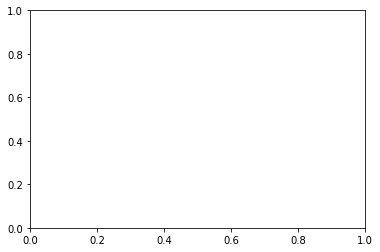

In [15]:
plt.plot(np.linspace(0.05, 0.95, 18), difference[0:19], 'r', np.linspace(0.05, 0.95, 18), difference[20:39], 'g',
         np.linspace(0.05, 0.95, 18), difference[40:58], 'y')

ValueError: x and y must have same first dimension, but have shapes (18L,) and (16L,)

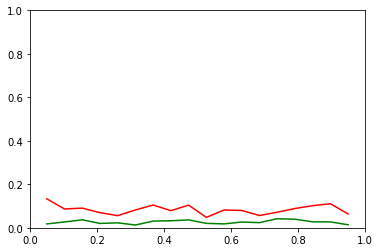

In [16]:
plt.plot(np.linspace(0.05, 0.95, 18), difference[0:18], 'r', np.linspace(0.05, 0.95, 18), difference[19:37], 'g',
         np.linspace(0.05, 0.95, 18), difference[38:56], 'y')

ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

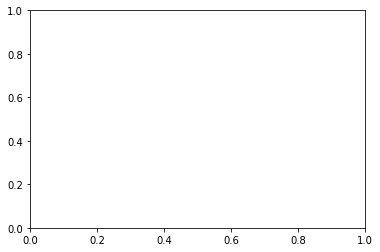

In [17]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:18], 'r', np.linspace(0.05, 0.95, 19), difference[19:37], 'g',
         np.linspace(0.05, 0.95, 19), difference[38:56], 'y')

ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

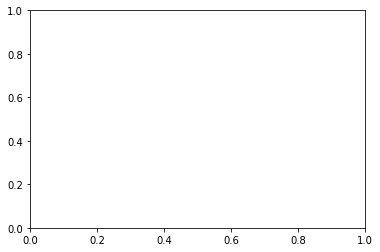

In [18]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:18], 'r', np.linspace(0.05, 0.95, 19), difference[19:37], 'g',
         np.linspace(0.05, 0.95, 19), difference[38:56], 'y')

ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

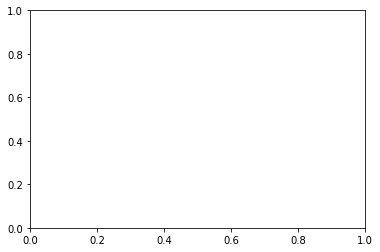

In [19]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:18], 'r')

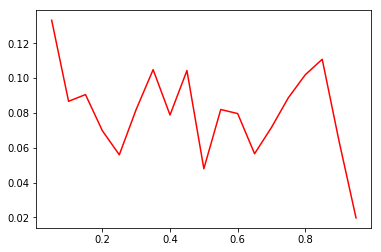

In [20]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:19], 'r')

ValueError: x and y must have same first dimension, but have shapes (19L,) and (14L,)

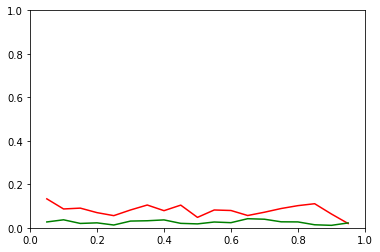

In [21]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:19], 'r', np.linspace(0.05, 0.95, 19), difference[20:39], 'g',
         np.linspace(0.05, 0.95, 19), difference[40:59], 'y')

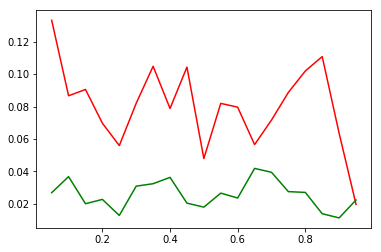

In [22]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:19], 'r', np.linspace(0.05, 0.95, 19), difference[20:39], 'g',
         )         

ValueError: x and y must have same first dimension, but have shapes (19L,) and (14L,)

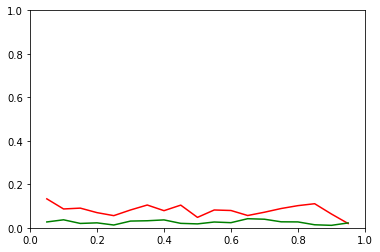

In [23]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:19], 'r', np.linspace(0.05, 0.95, 19), difference[20:39], 'g',
         np.linspace(0.05, 0.95, 19), difference[40:59], 'y')

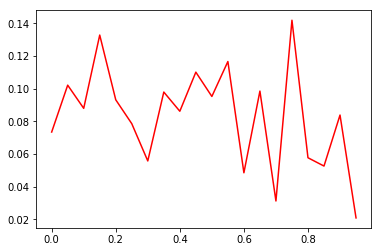

In [24]:
difference = []
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, 0.05)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05

plt.plot(np.linspace(0, 0.95, 20), difference[0:20], 'r')

ValueError: x and y must have same first dimension, but have shapes (20L,) and (19L,)

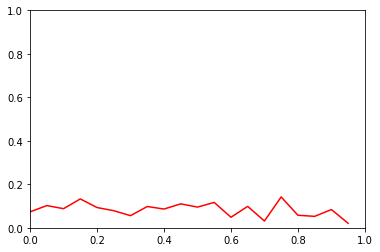

In [25]:
plt.plot(np.linspace(0, 0.95, 20), difference[0:20], 'r', np.linspace(0, 0.95, 20), difference[21:40], 'g')

ValueError: x and y must have same first dimension, but have shapes (20L,) and (19L,)

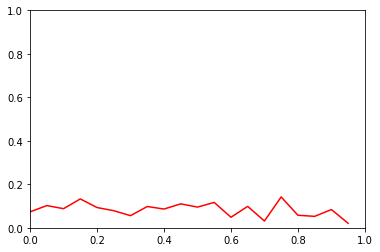

In [26]:
plt.plot(np.linspace(0, 0.95, 20), difference[0:20], 'r', np.linspace(0, 0.95, 20), difference[21:40], 'g')

ValueError: x and y must have same first dimension, but have shapes (20L,) and (19L,)

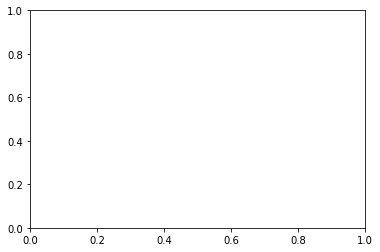

In [27]:
plt.plot(np.linspace(0, 0.95, 20), difference[0:19], 'r', np.linspace(0, 0.95, 20), difference[20:39], 'g',
         np.linspace(0.05, 0.95, 20), difference[40:59], 'y')

ValueError: x and y must have same first dimension, but have shapes (20L,) and (19L,)

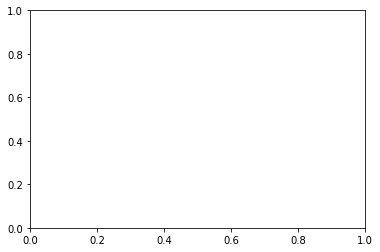

In [28]:
plt.plot(np.linspace(0, 0.95, 20), difference[0:19], 'r')

ValueError: x and y must have same first dimension, but have shapes (20L,) and (15L,)

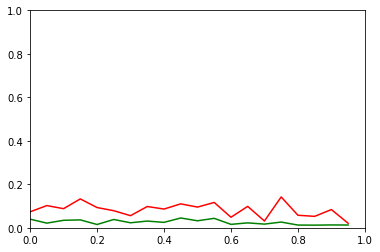

In [29]:
plt.plot(np.linspace(0, 0.95, 20), difference[0:20], 'r', np.linspace(0, 0.95, 20), difference[21:41], 'g',
         np.linspace(0.05, 0.95, 20), difference[42:62], 'y')

ValueError: x and y must have same first dimension, but have shapes (20L,) and (17L,)

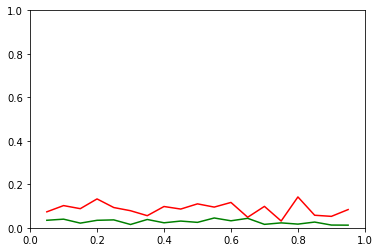

In [30]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:19], 'r', np.linspace(0.05, 0.95, 19), difference[20:39], 'g',
         np.linspace(0.05, 0.95, 20), difference[40:59], 'y')

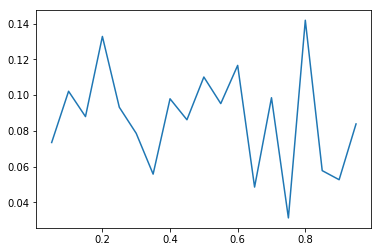

In [31]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:19])

ValueError: x and y must have same first dimension, but have shapes (19L,) and (20L,)

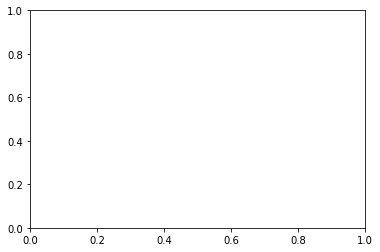

In [32]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:20])

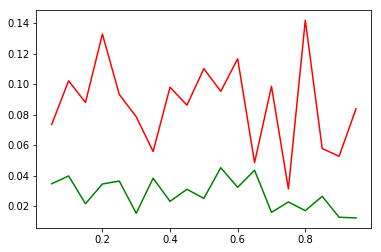

In [33]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:19], 'r', np.linspace(0.05, 0.95, 19), difference[20:39], 'g')

ValueError: x and y must have same first dimension, but have shapes (20L,) and (17L,)

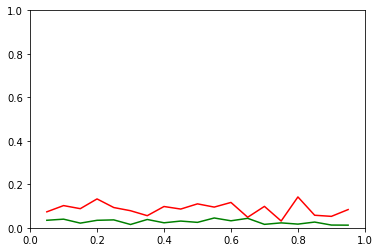

In [34]:
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:19], 'r', np.linspace(0.05, 0.95, 19), difference[20:39], 'g',
         np.linspace(0.05, 0.95, 20), difference[40:59], 'y')

ValueError: x and y must have same first dimension, but have shapes (20L,) and (17L,)

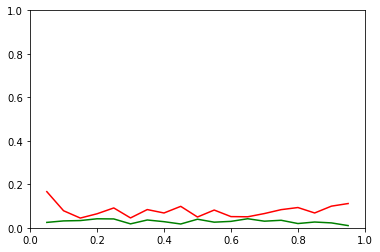

In [35]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, 0.05)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05

plt.plot(np.linspace(0.05, 0.95, 19), difference[0:19], 'r', np.linspace(0.05, 0.95, 19), difference[20:39], 'g',
         np.linspace(0.05, 0.95, 20), difference[40:59], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (19L,) and (17L,)

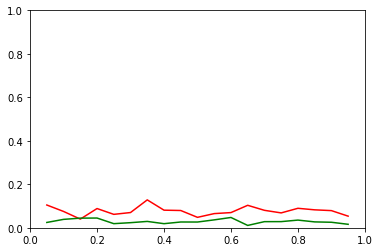

In [36]:

difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, 0.05)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05

plt.plot(reset_probabilities, difference[0:19], 'r', reset_probabilities, difference[20:39], 'g',
         reset_probabilities, difference[40:59], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (19L,) and (17L,)

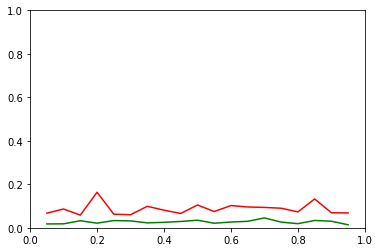

In [37]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, 0.05)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05

plt.plot(reset_probabilities, difference[0:19], 'r', reset_probabilities, difference[20:39], 'g',
         reset_probabilities, difference[40:59], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (19L,) and (17L,)

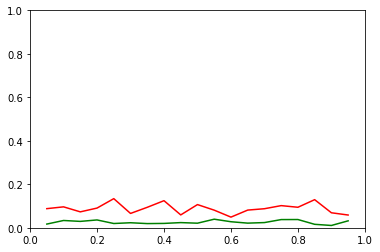

In [38]:

difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, 0.05)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05

plt.plot(reset_probabilities, difference[0:19], 'r', reset_probabilities, difference[20:39], 'g',
         reset_probabilities, difference[40:57], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()












ValueError: x and y must have same first dimension, but have shapes (19L,) and (17L,)

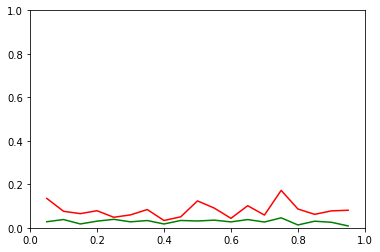

In [39]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, 0.05)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))

plt.plot(reset_probabilities, difference[0:19], 'r', reset_probabilities, difference[20:39], 'g',
         reset_probabilities, difference[40:59], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (19L,) and (17L,)

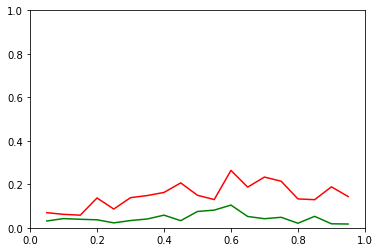

In [40]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))

plt.plot(reset_probabilities, difference[0:19], 'r', reset_probabilities, difference[20:39], 'g',
         reset_probabilities, difference[40:59], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

In [41]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
print len(difference)

57


ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

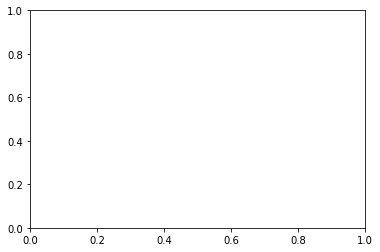

In [42]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))

plt.plot(reset_probabilities, difference[0:18], 'r', reset_probabilities, difference[19:37], 'g',
         reset_probabilities, difference[38:57], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

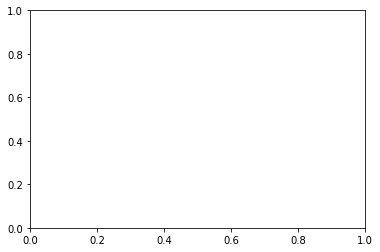

In [43]:

difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))

plt.plot(reset_probabilities, difference[0:18], 'r', reset_probabilities, difference[19:37], 'g',
         reset_probabilities, difference[38:56], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

In [44]:
print difference[16]
print difference[17]
print difference[18]

0.17633691678015145
0.1187239479511619
0.06030211527891643


In [45]:
print difference[56]
print difference[57]
print difference[58]

0.005799553419445062


IndexError: list index out of range

In [46]:
print difference[56]

0.005799553419445062


ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

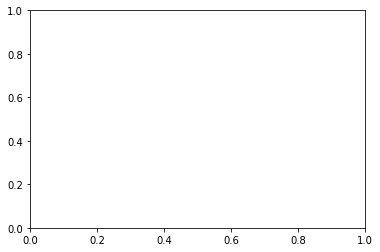

In [47]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))

plt.plot(reset_probabilities, difference[0:18], 'r', reset_probabilities, difference[19:37], 'g',
         reset_probabilities, difference[38:56], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

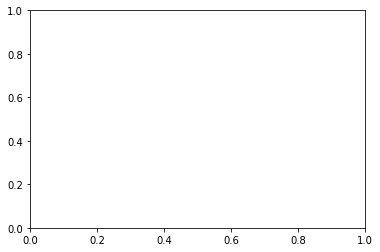

In [48]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))

plt.plot(reset_probabilities, difference[0:18], 'r', reset_probabilities, difference[19:37], 'g',
         reset_probabilities, difference[38:55], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

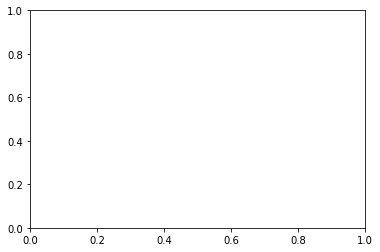

In [49]:

difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))

plt.plot(reset_probabilities, difference[0:18], 'r', reset_probabilities, difference[19:37], 'g',
         reset_probabilities, difference[38:56], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

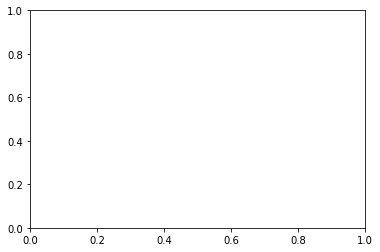

In [50]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))

plt.plot(reset_probabilities, difference[0:18], 'r', reset_probabilities, difference[19:37], 'g',
         reset_probabilities, difference[38:56], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

In [51]:
print len(difference[38:56])
print len(reset_probabilities)

18
19


In [52]:
print len(difference[0:18])
print len(reset_probabilities)

18
19


In [53]:
print 3*len(reset_probabilities)
print len(difference)

57
57


In [54]:
print reset_probabilities[18]


0.95


In [55]:
print reset_probabilities[19]

IndexError: list index out of range

In [56]:
print difference[56]

0.012532547936509568


ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

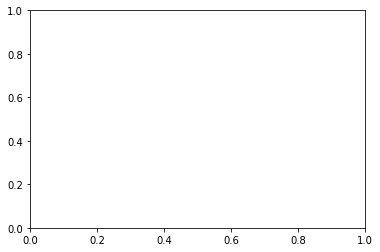

In [57]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    for reset_probability in reset_probabilities:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))

plt.plot(reset_probabilities, difference[0:18], 'r', reset_probabilities, difference[19:37], 'g',
         reset_probabilities, difference[38:56], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

In [58]:
print len(reset_probabilities), len(difference[38:56])

19 18


In [59]:
print len(reset_probabilities), len(difference[0:18])

19 18


ValueError: x and y must have same first dimension, but have shapes (19L,) and (17L,)

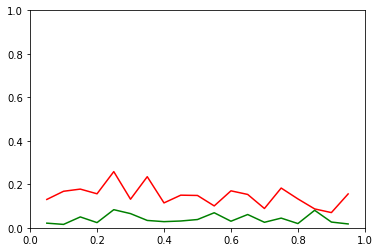

In [60]:
plt.plot(reset_probabilities, difference[0:19], 'r', reset_probabilities, difference[20:39], 'g',
         reset_probabilities, difference[40:59], 'y')

In [61]:
print len(difference)//len(reset_probabilities)

3


In [65]:
print len(reset_probabilities)
print len(difference[0:19])
print len(difference[20:39])
print len(difference[40:59])
print len(difference)
print difference[56]



19
19
19
17
57
0.005528300302807288


In [66]:
56//19


2

ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

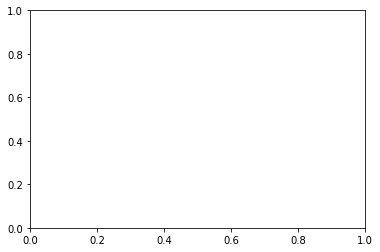

In [67]:
plt.plot(reset_probabilities, difference[0:18], 'r')

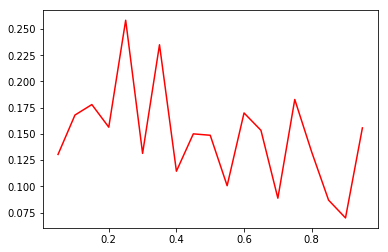

In [68]:
plt.plot(reset_probabilities, difference[0:19], 'r')

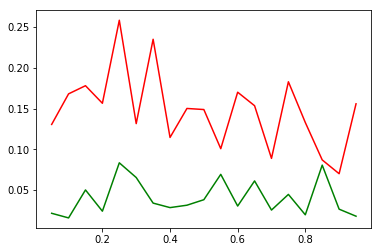

In [69]:
plt.plot(reset_probabilities, difference[0:19], 'r', reset_probabilities, difference[20:39], 'g')

ValueError: x and y must have same first dimension, but have shapes (19L,) and (17L,)

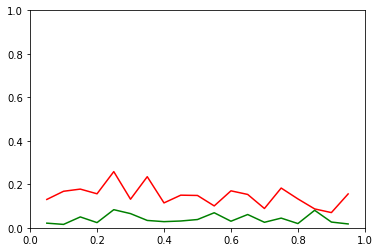

In [70]:
plt.plot(reset_probabilities, difference[0:19], 'r', reset_probabilities, difference[20:39], 'g', 
         reset_probabilities, difference[40:59], 'y')

In [71]:
print len(difference[40:59])

17


In [72]:
print len(difference[40:60])

17


ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

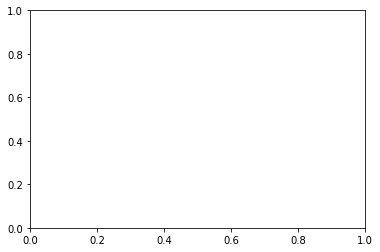

In [73]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
reset_probability = 0.05
i=0
for number_of_random_walks in numbers_of_random_walks:
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        i += 1
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(reset_probabilities, difference[0:18], 'r', reset_probabilities, difference[20:39], 'g',
         reset_probabilities, difference[40:59], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

In [74]:
print i

18


In [75]:
print len(difference[0:18])

18


ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

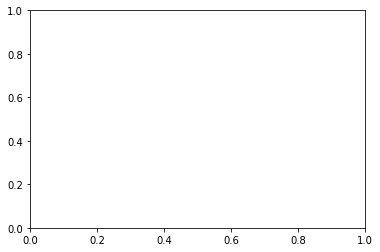

In [76]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.9:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(reset_probabilities, difference[0:18], 'r', reset_probabilities, difference[20:39], 'g',
         reset_probabilities, difference[40:59], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

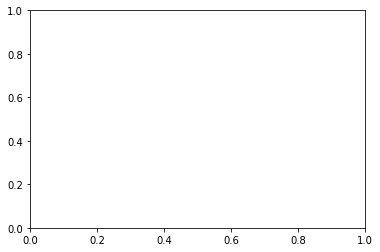

In [77]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.9:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(reset_probabilities, difference[0:18], 'r', reset_probabilities, difference[19:37], 'g',
         reset_probabilities, difference[38:57], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

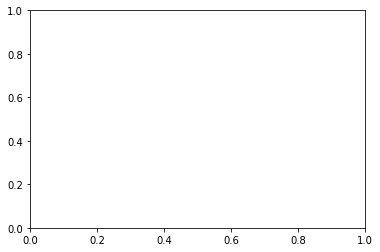

In [78]:

difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                       0.9, 0.95]
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.9:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(reset_probabilities, difference[0:18], 'r', reset_probabilities, difference[19:37], 'g',
         reset_probabilities, difference[38:56], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

In [79]:
print len(difference[38:56])
print len(reset_probabilities)

13
19


ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

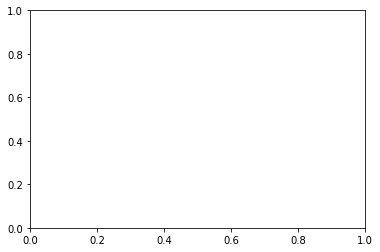

In [81]:
difference = []
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:18], 'r', np.linspace(0.05, 0.95, 19), difference[19:37], 'g',
         np.linspace(0.05, 0.95, 19), difference[38:56], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

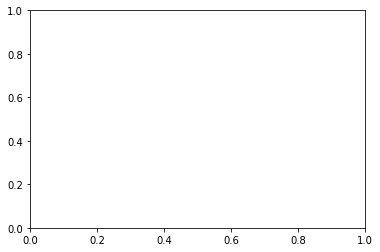

In [82]:
difference = []
numbers_of_random_walks = [10, 100]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:18], 'r', np.linspace(0.05, 0.95, 19), difference[19:37], 'g')#,
         #np.linspace(0.05, 0.95, 19), difference[38:56], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

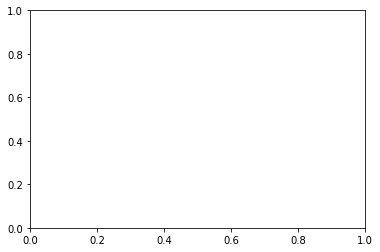

In [83]:
difference = []
numbers_of_random_walks = [10, 100]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:18], 'r', np.linspace(0.05, 0.95, 19), difference[19:37], 'g')#,
         #np.linspace(0.05, 0.95, 19), difference[38:56], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (19L,) and (18L,)

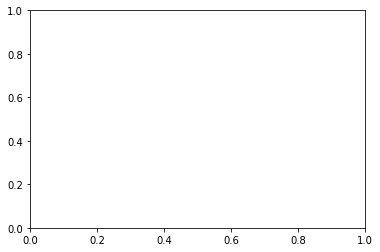

In [84]:
difference = []
numbers_of_random_walks = [10, 100]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(np.linspace(0.05, 0.95, 19), difference[0:18], 'r', np.linspace(0.05, 0.95, 19), difference[19:37], 'g')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()


In [85]:
print len(np.linspace(0.05, 0.95, 19)), len(difference[0:18])

19 18


In [86]:
np.linspace(0.05, 0.95, 19))[18]

SyntaxError: invalid syntax (<ipython-input-86-4e5ccacd7f0e>, line 1)

In [87]:
print list(np.linspace(0.05, 0.95, 19))

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.6, 0.65, 0.7, 0.75, 0.7999999999999999, 0.85, 0.9, 0.95]


In [88]:
print len(list(np.linspace(0.05, 0.95, 19)))

19


ValueError: x and y must have same first dimension, but have shapes (18L,) and (17L,)

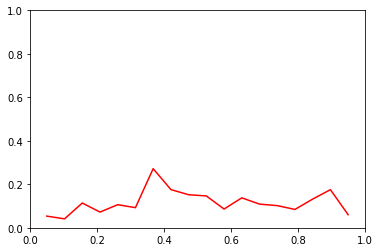

In [89]:
difference = []
numbers_of_random_walks = [10, 100]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(list(np.linspace(0.05, 0.95, 18)), difference[0:18], 'r', list(np.linspace(0.05, 0.95, 18)), difference[19:37], 'g')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

In [90]:
difference = []
numbers_of_random_walks = 10


In [91]:
reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05

IndentationError: unexpected indent (<ipython-input-91-acec0a2454b7>, line 2)

In [92]:
reset_probability = 0.05
while reset_probability <= 0.95:
    pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
    pr.initial_random_walks()
    page_ranks = pr.compute_personalized_page_ranks()
    page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                               max_iter=500, weight='weight')
    difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
    reset_probability += 0.05

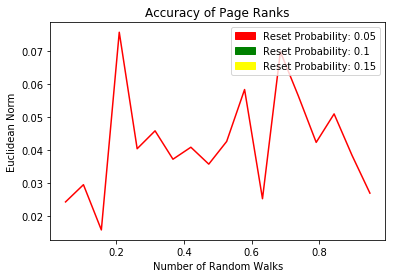

In [93]:
plt.plot(list(np.linspace(0.05, 0.95, 18)), difference[0:18], 'r')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

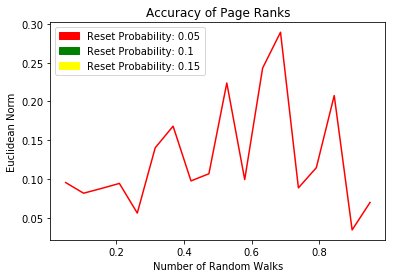

In [94]:

difference = []
numbers_of_random_walks = [10,100]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(list(np.linspace(0.05, 0.95, 18)), difference[0:18], 'r')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (18L,) and (17L,)

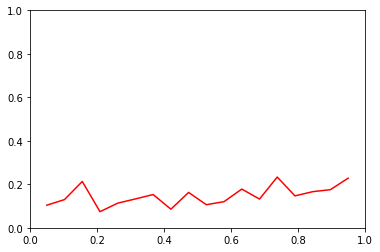

In [95]:
difference = []
numbers_of_random_walks = [10,100]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(list(np.linspace(0.05, 0.95, 18)), difference[0:18], 'r',
         list(np.linspace(0.05, 0.95, 18)), difference[19:37], 'g',
         )
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

In [96]:
len(difference)


36

In [97]:
difference[36<]

SyntaxError: invalid syntax (<ipython-input-97-82832414056c>, line 1)

In [98]:
difference[36]

IndexError: list index out of range

In [99]:
difference[35]


0.06515683381359473

ValueError: x and y must have same first dimension, but have shapes (18L,) and (16L,)

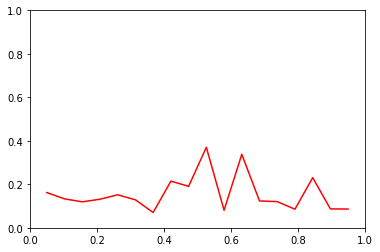

In [100]:
difference = []
numbers_of_random_walks = [10,100]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(list(np.linspace(0.05, 0.95, 18)), difference[0:18], 'r',
         list(np.linspace(0.05, 0.95, 18)), difference[19:35], 'g',
         )
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

In [101]:
difference = []
numbers_of_random_walks = [10, 100]
i = 0
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
        i += 1
print i

36


In [102]:
print difference[35]

0.03815429306736494


In [103]:
print difference[36]

IndexError: list index out of range

ValueError: x and y must have same first dimension, but have shapes (18L,) and (17L,)

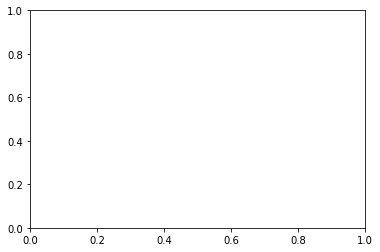

In [104]:
plt.plot(list(np.linspace(0.05, 0.95, 18)), difference[0:17], 'r',
         list(np.linspace(0.05, 0.95, 18)), difference[18:35], 'g',
         )

ValueError: x and y must have same first dimension, but have shapes (18L,) and (17L,)

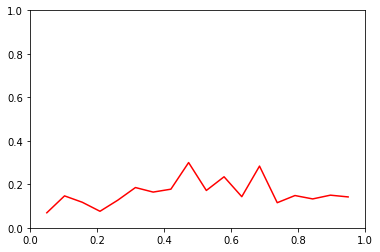

In [105]:
plt.plot(list(np.linspace(0.05, 0.95, 18)), difference[0:18], 'r',
         list(np.linspace(0.05, 0.95, 18)), difference[18:35], 'g',
         )


ValueError: x and y must have same first dimension, but have shapes (18L,) and (17L,)

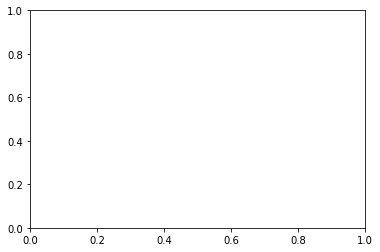

In [106]:
plt.plot(list(np.linspace(0.05, 0.95, 18)), difference[0:17], 'r',
         list(np.linspace(0.05, 0.95, 18)), difference[17:35], 'g',
         )


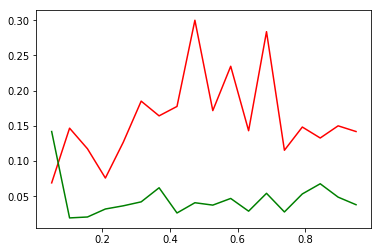

In [107]:
plt.plot(list(np.linspace(0.05, 0.95, 18)), difference[0:18], 'r',
         list(np.linspace(0.05, 0.95, 18)), difference[17:35], 'g',
         )


In [108]:
print list(np.linspace(0.05, 0.9, 17))

[0.05, 0.103125, 0.15625, 0.20937499999999998, 0.2625, 0.315625, 0.36874999999999997, 0.421875, 0.475, 0.528125, 0.58125, 0.634375, 0.6875, 0.740625, 0.7937500000000001, 0.846875, 0.9]


In [109]:
print list(np.linspace(0.05, 0.9, 16))

[0.05, 0.10666666666666666, 0.16333333333333333, 0.21999999999999997, 0.27666666666666667, 0.3333333333333333, 0.38999999999999996, 0.44666666666666666, 0.5033333333333333, 0.56, 0.6166666666666667, 0.6733333333333333, 0.73, 0.7866666666666666, 0.8433333333333334, 0.9]


In [110]:
list(np.linspace(0.05, 0.9, 15))

[0.05,
 0.11071428571428571,
 0.17142857142857143,
 0.23214285714285715,
 0.29285714285714287,
 0.35357142857142854,
 0.41428571428571426,
 0.475,
 0.5357142857142857,
 0.5964285714285714,
 0.6571428571428571,
 0.7178571428571429,
 0.7785714285714286,
 0.8392857142857143,
 0.9]

ValueError: x and y must have same first dimension, but have shapes (18L,) and (17L,)

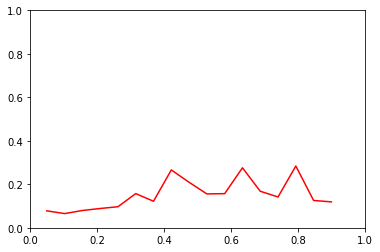

In [111]:
difference = []
numbers_of_random_walks = [10, 100]
i = []
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
        i.append(reset_probability)
plt.plot(list(np.linspace(0.05, 0.9, 17)), difference[0:17], 'r',
         list(np.linspace(0.05, 0.95, 18)), difference[18:35], 'g',
         )
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()



In [112]:
print i

[0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.6, 0.65, 0.7000000000000001, 0.7500000000000001, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.6, 0.65, 0.7000000000000001, 0.7500000000000001, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003]


In [113]:
len(i)


36

In [114]:
i[36]


IndexError: list index out of range

In [115]:
i[35]<

SyntaxError: invalid syntax (<ipython-input-115-26f887d82226>, line 1)

In [116]:
i[35]

0.9500000000000003

ValueError: x and y must have same first dimension, but have shapes (18L,) and (17L,)

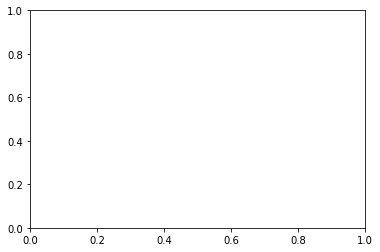

In [118]:
difference = []
numbers_of_random_walks = [10, 100]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(list(np.linspace(0.05, 0.9, 18)), difference[0:17], 'r',
         list(np.linspace(0.05, 0.9, 18)), difference[18:35], 'g',
         )
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

In [119]:
len(list(np.linspace(0.05, 0.9, 18))), len(difference[0:17])
len(list(np.linspace(0.05, 0.9, 18))), len(difference[18:35])

(18, 17)

In [120]:
print len(list(np.linspace(0.05, 0.9, 18))), len(difference[0:17])
print len(list(np.linspace(0.05, 0.9, 18))), len(difference[18:35])

18 17
18 17


In [121]:
len(list(np.linspace(0.05, 0.9, 18))), len(difference[0:18])
len(list(np.linspace(0.05, 0.9, 18))), len(difference[18:35])

(18, 17)

In [122]:
print len(list(np.linspace(0.05, 0.9, 18))), len(difference[0:18])
print len(list(np.linspace(0.05, 0.9, 18))), len(difference[18:35])

18 18
18 17


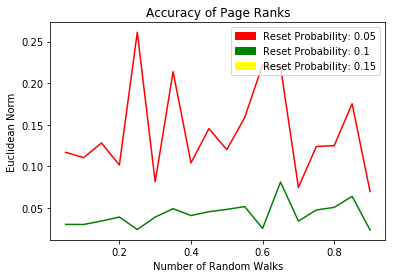

In [123]:

difference = []
numbers_of_random_walks = [10, 100]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(list(np.linspace(0.05, 0.9, 18)), difference[0:18], 'r',
         list(np.linspace(0.05, 0.9, 18)), difference[18:36], 'g',
         )
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

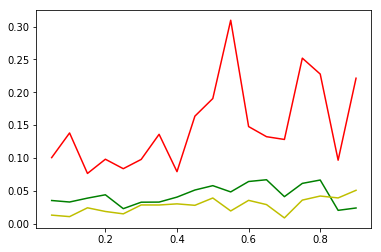

In [124]:
difference = []
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(list(np.linspace(0.05, 0.9, 18)), difference[0:18], 'r',
         list(np.linspace(0.05, 0.9, 18)), difference[18:36], 'g',
         list(np.linspace(0.05, 0.9, 18)), difference[36:64], 'y',
         )

54


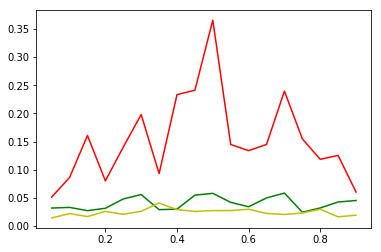

In [125]:
difference = []
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(list(np.linspace(0.05, 0.9, 18)), difference[0:18], 'r',
         list(np.linspace(0.05, 0.9, 18)), difference[18:36], 'g',
         list(np.linspace(0.05, 0.9, 18)), difference[36:64], 'y',
         )
print len(difference)

In [126]:
number_of_random_walks = 10
random_walk_length = 5
difference = list()
while number_of_random_walks <= 600:
    number_of_random_walks += 200
    random_walk_length = 5
    while random_walk_length <= 100:
        random_walk_length += 1
        pr = IncrementalPersonalizedPageRank(graph, 0, number_of_random_walks, 0.05, random_walk_length)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')

        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
plt.plot(range(6, 101), difference[0:95], 'r', range(6, 101), difference[96:191], 'g',
         range(6, 101), difference[192:287], 'y')


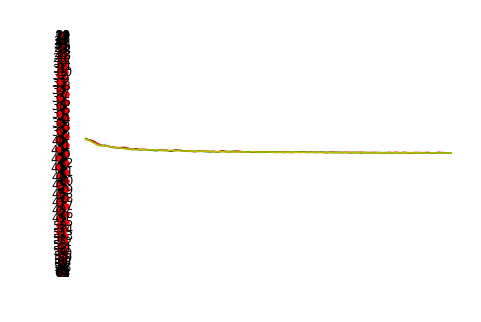

In [5]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from Page_Rank import IncrementalPersonalizedPageRank
from Page_Rank2 import IncrementalPersonalizedPageRank2
import numpy as np

random.seed(111)
graph = nx.DiGraph()
number_of_nodes = random.randint(2, 100)
nodes = range(number_of_nodes)
graph.add_nodes_from(nodes)
number_of_random_walks = 10
random_walk_length = 5
difference = list()

for _ in range(2 * number_of_nodes):
    node_1 = random.choice(list(graph.nodes))
    node_2 = random.choice(list(set(graph.nodes) - {node_1}))
    if graph.has_edge(node_1, node_2) or graph.has_edge(node_2, node_1):
        continue
    else:
        weight = random.randint(0, 10)
        graph.add_weighted_edges_from([(node_1, node_2, weight)])
nx.draw_circular(graph, node_size=30, with_labels=True)

number_of_random_walks = 10
random_walk_length = 5
difference = list()
while number_of_random_walks <= 600:
    number_of_random_walks += 200
    random_walk_length = 5
    while random_walk_length <= 100:
        random_walk_length += 1
        pr = IncrementalPersonalizedPageRank(graph, 0, number_of_random_walks, 0.05, random_walk_length)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')

        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
plt.plot(range(6, 101), difference[0:95], 'r', range(6, 101), difference[96:191], 'g',
         range(6, 101), difference[192:287], 'y')



In [13]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from Page_Rank import IncrementalPersonalizedPageRank
from Page_Rank2 import IncrementalPersonalizedPageRank2
import numpy as np

random.seed(111)
graph = nx.DiGraph()
number_of_nodes = random.randint(2, 100)
nodes = range(number_of_nodes)
graph.add_nodes_from(nodes)
number_of_random_walks = 10
random_walk_length = 5
difference = list()

for _ in range(2 * number_of_nodes):
    node_1 = random.choice(list(graph.nodes))
    node_2 = random.choice(list(set(graph.nodes) - {node_1}))
    if graph.has_edge(node_1, node_2) or graph.has_edge(node_2, node_1):
        continue
    else:
        weight = random.randint(0, 10)
        graph.add_weighted_edges_from([(node_1, node_2, weight)])

number_of_random_walks = 10
random_walk_length = 5
difference = list()
while number_of_random_walks <= 600:
    number_of_random_walks += 200
    random_walk_length = 5
    while random_walk_length <= 100:
        random_walk_length += 1
        pr = IncrementalPersonalizedPageRank(graph, 0, number_of_random_walks, 0.05, random_walk_length)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')

        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
plt.plot(range(6, 101), difference[0:95], 'r', range(6, 101), difference[96:191], 'g',
         range(6, 101), difference[192:287], 'y')
plt.show()




KeyboardInterrupt: 

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from Page_Rank import IncrementalPersonalizedPageRank
from Page_Rank2 import IncrementalPersonalizedPageRank2
import numpy as np

random.seed(111)
graph = nx.DiGraph()
number_of_nodes = random.rand<y<x<xint(2, 100)
nodes = range(number_of_nodes)
graph.add_nodes_from(nodes)
number_of_random_walks = 10
random_walk_length = 5
difference = list()

for _ in range(2 * number_of_nodes):
    node_1 = random.choice(list(graph.nodes))
    node_2 = random.choice(list(set(graph.nodes) - {node_1}))
    if graph.has_edge(node_1, node_2) or graph.has_edge(node_2, node_1):
        continue
    else:
        weight = random.randint(0, 10)
        graph.add_weighted_edges_from([(node_1, node_2, weight)])

number_of_random_walks = 10
random_walk_length = 5
difference = list()
while number_of_random_walks <= 600:
    number_of_random_walks += 200
    random_walk_length = 5
    while random_walk_length <= 100:
        random_walk_length += 1
        pr = IncrementalPersonalizedPageRank(graph, 0, number_of_random_walks, 0.05, random_walk_length)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')

        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
plt.plot(range(6, 101), difference[0:95], 'r', range(6, 101), difference[96:191], 'g',
         range(6, 101), difference[192:287], 'y')
red_patch = mpatches.Patch(color='red', label='210 Random Walks')
green_patch = mpatches.Patch(color='green', label='410 Random Walks')
yellow_patch = mpatches.Patch(color='yellow', label='610 Random Walks')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')möl

plt.xlabel('Random Walk Length')
plt.show()






SyntaxError: invalid syntax (<ipython-input-1-dcc9323e2f35>, line 49)

In [2]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from Page_Rank import IncrementalPersonalizedPageRank
from Page_Rank2 import IncrementalPersonalizedPageRank2
import numpy as np

random.seed(111)
graph = nx.DiGraph()
number_of_nodes = random.randint(2, 100)
nodes = range(number_of_nodes)
graph.add_nodes_from(nodes)
number_of_random_walks = 10
random_walk_length = 5
difference = list()

for _ in range(2 * number_of_nodes):
    node_1 = random.choice(list(graph.nodes))
    node_2 = random.choice(list(set(graph.nodes) - {node_1}))
    if graph.has_edge(node_1, node_2) or graph.has_edge(node_2, node_1):
        continue
    else:
        weight = random.randint(0, 10)
        graph.add_weighted_edges_from([(node_1, node_2, weight)])

number_of_random_walks = 10
random_walk_length = 5
difference = list()
while number_of_random_walks <= 600:
    number_of_random_walks += 200
    random_walk_length = 5
    while random_walk_length <= 100:
        random_walk_length += 1
        pr = IncrementalPersonalizedPageRank(graph, 0, number_of_random_walks, 0.05, random_walk_length)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')

        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
plt.plot(range(6, 101), difference[0:95], 'r', range(6, 101), difference[96:191], 'g',
         range(6, 101), difference[192:287], 'y')
red_patch = mpatches.Patch(color='red', label='210 Random Walks')
green_patch = mpatches.Patch(color='green', label='410 Random Walks')
yellow_patch = mpatches.Patch(color='yellow', label='610 Random Walks')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Random Walk Length')
plt.show()







<Figure size 640x480 with 1 Axes>

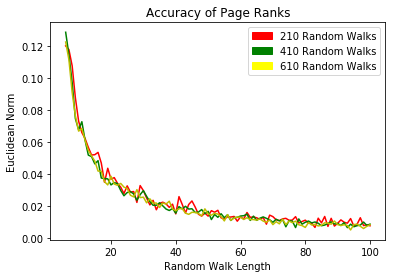

In [3]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from Page_Rank import IncrementalPersonalizedPageRank
from Page_Rank2 import IncrementalPersonalizedPageRank2
import numpy as np

random.seed(111)
graph = nx.DiGraph()
number_of_nodes = random.randint(2, 100)
nodes = range(number_of_nodes)
graph.add_nodes_from(nodes)
number_of_random_walks = 10
random_walk_length = 5
difference = list()

for _ in range(2 * number_of_nodes):
    node_1 = random.choice(list(graph.nodes))
    node_2 = random.choice(list(set(graph.nodes) - {node_1}))
    if graph.has_edge(node_1, node_2) or graph.has_edge(node_2, node_1):
        continue
    else:
        weight = random.randint(0, 10)
        graph.add_weighted_edges_from([(node_1, node_2, weight)])

number_of_random_walks = 10
random_walk_length = 5
difference = list()
while number_of_random_walks <= 600:
    number_of_random_walks += 200
    random_walk_length = 5
    while random_walk_length <= 100:
        random_walk_length += 1
        pr = IncrementalPersonalizedPageRank(graph, 0, number_of_random_walks, 0.05, random_walk_length)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')

        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
plt.plot(range(6, 101), difference[0:95], 'r', range(6, 101), difference[96:191], 'g',
         range(6, 101), difference[192:287], 'y')
red_patch = mpatches.Patch(color='red', label='210 Random Walks')
green_patch = mpatches.Patch(color='green', label='410 Random Walks')
yellow_patch = mpatches.Patch(color='yellow', label='610 Random Walks')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Random Walk Length')
plt.show()







In [4]:
print len(difference)

288


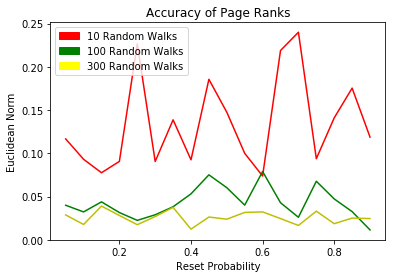

In [5]:
difference = []
numbers_of_random_walks = [10, 100, 300]
for number_of_random_walks in numbers_of_random_walks:
    reset_probability = 0.05
    while reset_probability <= 0.95:
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, reset_probability)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=1-reset_probability, personalization={0: 1},
                                   max_iter=500, weight='weight')
        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
        reset_probability += 0.05
plt.plot(list(np.linspace(0.05, 0.9, 18)), difference[0:18], 'r',
         list(np.linspace(0.05, 0.9, 18)), difference[18:36], 'g',
         list(np.linspace(0.05, 0.9, 18)), difference[36:64], 'y',
         )
red_patch = mpatches.Patch(color='red', label='10 Random Walks')
green_patch = mpatches.Patch(color='green', label='100 Random Walks')
yellow_patch = mpatches.Patch(color='yellow', label='300 Random Walks')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Reset Probability')
plt.show()

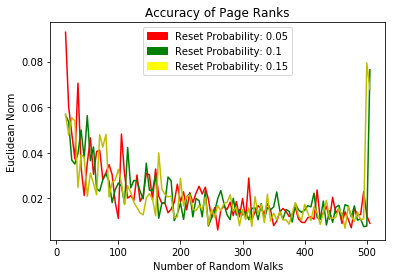

In [6]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.3, 0.5, 0.7, 0.9]
for reset_probability in reset_probabilities:
    number_of_random_walks = 10
    while number_of_random_walks <= 500:
        number_of_random_walks += 5
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, 0.05)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')

        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
plt.plot(range(15, 510, 5), difference[0:99], 'r', range(15, 510, 5), difference[100:199], 'g',
         range(15, 510, 5), difference[200:299], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()

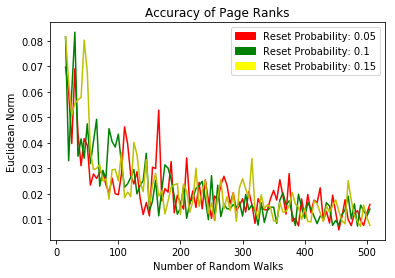

In [7]:
difference = []
reset_probabilities = [0.05, 0.1, 0.15, 0.3, 0.5, 0.7, 0.9]
for reset_probability in reset_probabilities:
    number_of_random_walks = 10
    while number_of_random_walks <= 500:
        number_of_random_walks += 5
        pr = IncrementalPersonalizedPageRank2(graph, 0, number_of_random_walks, 0.05)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.95, personalization={0: 1},
                                   max_iter=500, weight='weight')

        difference.append(np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())))
plt.plot(range(15, 510, 5), difference[0:99], 'r', range(15, 510, 5), difference[99:198], 'g',
         range(15, 510, 5), difference[198:297], 'y')
red_patch = mpatches.Patch(color='red', label='Reset Probability: 0.05')
green_patch = mpatches.Patch(color='green', label='Reset Probability: 0.1')
yellow_patch = mpatches.Patch(color='yellow', label='Reset Probability: 0.15')
plt.legend(handles=[red_patch, green_patch, yellow_patch])
plt.title('Accuracy of Page Ranks')
plt.ylabel('Euclidean Norm')
plt.xlabel('Number of Random Walks')
plt.show()


